# ENFUSE - Passenger Data

## Authored by - Abhishek Gupte

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
# %matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [6]:
from sklearn.model_selection import train_test_split,cross_val_score,TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
from sktime.performance_metrics.forecasting import mean_absolute_error

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, auc

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
import numpy as np

In [11]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import backtesting_forecaster

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
data = pd.read_csv('../datasets/pedestrian-counts-1-jan-2-april-2023.csv')

# Dropping the unncesessary columns
for column in data:
    if "IN" in column:
        data.drop(column, axis=1, inplace=True)
    elif "OUT" in column:
        data.drop(column, axis=1, inplace=True)
    elif "North Strand" in column:
        data.drop(column, axis=1, inplace=True)
    elif "Drumcondra Cyclists 1" in column:
        data.drop(column, axis=1, inplace=True)
        
# Convert the 'Time' to pandas datetime format
data['Time'] = pd.to_datetime(data['Time'], dayfirst=True)
# Separating the date and the hours
data["Date"] = data["Time"].dt.date
data["Time"] = data["Time"].dt.time

# Setting the 'Date' as the index
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)
# Resampling the dataset to show only days and not hours
data = data.resample("D").sum()

print(data)

            Aston Quay/Fitzgeralds  Bachelors walk/Bachelors way  \
Date                                                               
2023-01-01                 63870.0                           0.0   
2023-01-02                 61874.0                           0.0   
2023-01-03                 66584.0                           0.0   
2023-01-04                 64187.0                           0.0   
2023-01-05                 68108.0                           0.0   
...                            ...                           ...   
2023-03-29                 73596.0                           0.0   
2023-03-30                 79761.0                           0.0   
2023-03-31                 88332.0                         364.0   
2023-04-01                 88105.0                           0.0   
2023-04-02                 76113.0                           1.0   

            Baggot st lower/Wilton tce inbound  \
Date                                             
2023-01-01     

In [14]:
len(data)

92

In [15]:
data.head()

,Aston Quay/Fitzgeralds,Bachelors walk/Bachelors way,Baggot st lower/Wilton tce inbound,Baggot st upper/Mespil rd/Bank,Capel st/Mary street,College Green/Bank Of Ireland,College Green/Church Lane,College st/Westmoreland st,D'olier st/Burgh Quay,Dame Street/Londis,...,O'Connell St/Pennys Pedestrian,O'Connell st/Princes st North,Phibsborough Rd/Enniskerry Road,Phibsborough Rd/Munster St,Richmond st south/Portabello Harbour inbound,Richmond st south/Portabello Harbour outbound,Talbot st/Guineys,Talbot st/Murrays Pharmacy,Westmoreland Street East/Fleet street,Westmoreland Street West/Carrolls
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,63870.0,0.0,2064.0,100665.0,29285.0,18588.0,11710.0,7902.0,27049.0,11142.0,...,0.0,15125.0,1451.0,0.0,9708.0,4478.0,44379.0,49827.0,7515.0,23537.0
2023-01-02,61874.0,0.0,1715.0,84059.0,29383.0,20905.0,12505.0,8081.0,24820.0,10230.0,...,0.0,15405.0,1651.0,0.0,3403.0,3867.0,43833.0,50622.0,6746.0,23075.0
2023-01-03,66584.0,0.0,3810.0,135259.0,32436.0,22885.0,15048.0,11875.0,24307.0,12294.0,...,0.0,18496.0,1846.0,0.0,2931.0,3920.0,38397.0,37951.0,7332.0,23191.0
2023-01-04,64187.0,0.0,7045.0,129620.0,37916.0,19641.0,14108.0,11547.0,21022.0,12148.0,...,0.0,17441.0,1923.0,0.0,14856.0,4017.0,38284.0,35921.0,7444.0,20789.0
2023-01-05,68108.0,0.0,4965.0,136491.0,37777.0,19809.0,13264.0,11507.0,23958.0,11157.0,...,0.0,17126.0,1965.0,0.0,24280.0,4268.0,41570.0,42018.0,7008.0,22001.0


In [16]:
data_columns = data.columns[1:]

In [17]:
data_ped_zeroes = [
    data.loc[
        (data[column] == 0.0) | (data[column].isnull()), 
        column
    ].size
    for column in data_columns
]

In [18]:
data_ped_combined = dict(zip(data_columns,data_ped_zeroes))
df_zeroes_count = pd.Series(data_ped_combined)

In [19]:
data_ped_combined

{'Bachelors walk/Bachelors way': 74,
 'Baggot st lower/Wilton tce inbound': 0,
 'Baggot st upper/Mespil rd/Bank': 0,
 'Capel st/Mary street': 0,
 'College Green/Bank Of Ireland': 1,
 'College Green/Church Lane': 65,
 'College st/Westmoreland st': 0,
 "D'olier st/Burgh Quay": 1,
 'Dame Street/Londis': 0,
 'Dawson Street/Molesworth': 83,
 'Grafton st/Monsoon Pedestrian': 91,
 'Grafton Street / Nassau Street / Suffolk Street': 0,
 'Grafton Street/CompuB': 1,
 'Grand Canal st upp/Clanwilliam place': 0,
 'Grand Canal st upp/Clanwilliam place/Google': 0,
 'Henry Street/Coles Lane/Dunnes': 0,
 'Liffey st/Halfpenny Bridge ': 0,
 'Mary st/Jervis st': 0,
 'Newcomen Bridge/Charleville mall inbound': 87,
 'Newcomen Bridge/Charleville mall outbound': 86,
 'North Wall Quay/Samuel Beckett bridge East': 0,
 'North Wall Quay/Samuel Beckett bridge West': 0,
 "O'Connell St/Parnell St/AIB": 0,
 "O'Connell St/Pennys Pedestrian": 92,
 "O'Connell st/Princes st North": 0,
 'Phibsborough Rd/Enniskerry Road': 0

In [20]:
df_zeroes_count

Bachelors walk/Bachelors way                       74
Baggot st lower/Wilton tce inbound                  0
Baggot st upper/Mespil rd/Bank                      0
Capel st/Mary street                                0
College Green/Bank Of Ireland                       1
College Green/Church Lane                          65
College st/Westmoreland st                          0
D'olier st/Burgh Quay                               1
Dame Street/Londis                                  0
Dawson Street/Molesworth                           83
Grafton st/Monsoon Pedestrian                      91
Grafton Street / Nassau Street / Suffolk Street     0
Grafton Street/CompuB                               1
Grand Canal st upp/Clanwilliam place                0
Grand Canal st upp/Clanwilliam place/Google         0
Henry Street/Coles Lane/Dunnes                      0
Liffey st/Halfpenny Bridge                          0
Mary st/Jervis st                                   0
Newcomen Bridge/Charleville 

In [21]:
df_our_columns_list = list(df_zeroes_count[ df_zeroes_count < 46 ].index)
# Dropped columns where count of 0's was greater than 42
df_our_columns_list

['Baggot st lower/Wilton tce inbound',
 'Baggot st upper/Mespil rd/Bank',
 'Capel st/Mary street',
 'College Green/Bank Of Ireland',
 'College st/Westmoreland st',
 "D'olier st/Burgh Quay",
 'Dame Street/Londis',
 'Grafton Street / Nassau Street / Suffolk Street',
 'Grafton Street/CompuB',
 'Grand Canal st upp/Clanwilliam place',
 'Grand Canal st upp/Clanwilliam place/Google',
 'Henry Street/Coles Lane/Dunnes',
 'Liffey st/Halfpenny Bridge ',
 'Mary st/Jervis st',
 'North Wall Quay/Samuel Beckett bridge East',
 'North Wall Quay/Samuel Beckett bridge West',
 "O'Connell St/Parnell St/AIB",
 "O'Connell st/Princes st North",
 'Phibsborough Rd/Enniskerry Road',
 'Richmond st south/Portabello Harbour inbound',
 'Richmond st south/Portabello Harbour outbound',
 'Talbot st/Guineys',
 'Westmoreland Street East/Fleet street',
 'Westmoreland Street West/Carrolls']

In [22]:
df_our_data = data.loc[:,df_our_columns_list]

In [23]:
len(df_our_data)

92

In [24]:
df_our_data

,Baggot st lower/Wilton tce inbound,Baggot st upper/Mespil rd/Bank,Capel st/Mary street,College Green/Bank Of Ireland,College st/Westmoreland st,D'olier st/Burgh Quay,Dame Street/Londis,Grafton Street / Nassau Street / Suffolk Street,Grafton Street/CompuB,Grand Canal st upp/Clanwilliam place,...,North Wall Quay/Samuel Beckett bridge East,North Wall Quay/Samuel Beckett bridge West,O'Connell St/Parnell St/AIB,O'Connell st/Princes st North,Phibsborough Rd/Enniskerry Road,Richmond st south/Portabello Harbour inbound,Richmond st south/Portabello Harbour outbound,Talbot st/Guineys,Westmoreland Street East/Fleet street,Westmoreland Street West/Carrolls
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,2064.0,100665.0,29285.0,18588.0,7902.0,27049.0,11142.0,4001.0,20313.0,1070.0,...,47045.0,26631.0,8882.0,15125.0,1451.0,9708.0,4478.0,44379.0,7515.0,23537.0
2023-01-02,1715.0,84059.0,29383.0,20905.0,8081.0,24820.0,10230.0,4552.0,23280.0,1181.0,...,48381.0,17630.0,11273.0,15405.0,1651.0,3403.0,3867.0,43833.0,6746.0,23075.0
2023-01-03,3810.0,135259.0,32436.0,22885.0,11875.0,24307.0,12294.0,6469.0,29041.0,2974.0,...,50489.0,27378.0,12503.0,18496.0,1846.0,2931.0,3920.0,38397.0,7332.0,23191.0
2023-01-04,7045.0,129620.0,37916.0,19641.0,11547.0,21022.0,12148.0,5900.0,32706.0,3396.0,...,64225.0,31655.0,12949.0,17441.0,1923.0,14856.0,4017.0,38284.0,7444.0,20789.0
2023-01-05,4965.0,136491.0,37777.0,19809.0,11507.0,23958.0,11157.0,5474.0,30316.0,3508.0,...,59560.0,29232.0,12690.0,17126.0,1965.0,24280.0,4268.0,41570.0,7008.0,22001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,4703.0,150904.0,37885.0,4219.0,17149.0,24685.0,13139.0,7145.0,21939.0,5314.0,...,80157.0,50144.0,14245.0,19516.0,2298.0,13417.0,6236.0,73310.0,26340.0,0.0
2023-03-30,4647.0,144601.0,44554.0,4309.0,17529.0,25515.0,14493.0,7564.0,23908.0,5367.0,...,78009.0,49403.0,15080.0,20618.0,2429.0,16030.0,6385.0,73797.0,25129.0,0.0
2023-03-31,3085.0,152987.0,36083.0,2775.0,14696.0,28320.0,11373.0,5391.0,23297.0,3501.0,...,64906.0,38739.0,14007.0,15631.0,2201.0,14616.0,4955.0,98005.0,22415.0,0.0


In [25]:
df_our_data.columns

Index(['Baggot st lower/Wilton tce inbound', 'Baggot st upper/Mespil rd/Bank',
       'Capel st/Mary street', 'College Green/Bank Of Ireland',
       'College st/Westmoreland st', 'D'olier st/Burgh Quay',
       'Dame Street/Londis', 'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Street/CompuB', 'Grand Canal st upp/Clanwilliam place',
       'Grand Canal st upp/Clanwilliam place/Google',
       'Henry Street/Coles Lane/Dunnes', 'Liffey st/Halfpenny Bridge ',
       'Mary st/Jervis st', 'North Wall Quay/Samuel Beckett bridge East',
       'North Wall Quay/Samuel Beckett bridge West',
       'O'Connell St/Parnell St/AIB', 'O'Connell st/Princes st North',
       'Phibsborough Rd/Enniskerry Road',
       'Richmond st south/Portabello Harbour inbound',
       'Richmond st south/Portabello Harbour outbound', 'Talbot st/Guineys',
       'Westmoreland Street East/Fleet street',
       'Westmoreland Street West/Carrolls'],
      dtype='object')

In [26]:
df_our_data[-1:]

,Baggot st lower/Wilton tce inbound,Baggot st upper/Mespil rd/Bank,Capel st/Mary street,College Green/Bank Of Ireland,College st/Westmoreland st,D'olier st/Burgh Quay,Dame Street/Londis,Grafton Street / Nassau Street / Suffolk Street,Grafton Street/CompuB,Grand Canal st upp/Clanwilliam place,...,North Wall Quay/Samuel Beckett bridge East,North Wall Quay/Samuel Beckett bridge West,O'Connell St/Parnell St/AIB,O'Connell st/Princes st North,Phibsborough Rd/Enniskerry Road,Richmond st south/Portabello Harbour inbound,Richmond st south/Portabello Harbour outbound,Talbot st/Guineys,Westmoreland Street East/Fleet street,Westmoreland Street West/Carrolls
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-02,2015.0,116674.0,38087.0,6106.0,12480.0,25275.0,13533.0,5700.0,26013.0,2106.0,...,36388.0,18485.0,13737.0,18634.0,2970.0,14862.0,6218.0,75642.0,29008.0,0.0


In [27]:
df_our_data.index.astype

<bound method Index.astype of DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '202

In [28]:
df_spread_descending = list(df_our_data.describe().loc['std',:].sort_values(ascending = True).index)

In [29]:
df_spread_descending

['Phibsborough Rd/Enniskerry Road',
 'Grand Canal st upp/Clanwilliam place/Google',
 'Richmond st south/Portabello Harbour outbound',
 "O'Connell St/Parnell St/AIB",
 'Baggot st lower/Wilton tce inbound',
 'Grand Canal st upp/Clanwilliam place',
 'Mary st/Jervis st',
 'Grafton Street / Nassau Street / Suffolk Street',
 'Dame Street/Londis',
 "O'Connell st/Princes st North",
 'College st/Westmoreland st',
 "D'olier st/Burgh Quay",
 'Grafton Street/CompuB',
 'College Green/Bank Of Ireland',
 'Richmond st south/Portabello Harbour inbound',
 'Capel st/Mary street',
 'Liffey st/Halfpenny Bridge ',
 'Westmoreland Street East/Fleet street',
 'North Wall Quay/Samuel Beckett bridge West',
 'Talbot st/Guineys',
 'Henry Street/Coles Lane/Dunnes',
 'Westmoreland Street West/Carrolls',
 'North Wall Quay/Samuel Beckett bridge East',
 'Baggot st upper/Mespil rd/Bank']

In [30]:
df_our_data = df_our_data[df_spread_descending]

In [31]:
df_our_data

,Phibsborough Rd/Enniskerry Road,Grand Canal st upp/Clanwilliam place/Google,Richmond st south/Portabello Harbour outbound,O'Connell St/Parnell St/AIB,Baggot st lower/Wilton tce inbound,Grand Canal st upp/Clanwilliam place,Mary st/Jervis st,Grafton Street / Nassau Street / Suffolk Street,Dame Street/Londis,O'Connell st/Princes st North,...,Richmond st south/Portabello Harbour inbound,Capel st/Mary street,Liffey st/Halfpenny Bridge,Westmoreland Street East/Fleet street,North Wall Quay/Samuel Beckett bridge West,Talbot st/Guineys,Henry Street/Coles Lane/Dunnes,Westmoreland Street West/Carrolls,North Wall Quay/Samuel Beckett bridge East,Baggot st upper/Mespil rd/Bank
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1451.0,934.0,4478.0,8882.0,2064.0,1070.0,6590.0,4001.0,11142.0,15125.0,...,9708.0,29285.0,138901.0,7515.0,26631.0,44379.0,57197.0,23537.0,47045.0,100665.0
2023-01-02,1651.0,935.0,3867.0,11273.0,1715.0,1181.0,12030.0,4552.0,10230.0,15405.0,...,3403.0,29383.0,133756.0,6746.0,17630.0,43833.0,89241.0,23075.0,48381.0,84059.0
2023-01-03,1846.0,1418.0,3920.0,12503.0,3810.0,2974.0,11027.0,6469.0,12294.0,18496.0,...,2931.0,32436.0,138113.0,7332.0,27378.0,38397.0,97978.0,23191.0,50489.0,135259.0
2023-01-04,1923.0,1505.0,4017.0,12949.0,7045.0,3396.0,9333.0,5900.0,12148.0,17441.0,...,14856.0,37916.0,133435.0,7444.0,31655.0,38284.0,96368.0,20789.0,64225.0,129620.0
2023-01-05,1965.0,1612.0,4268.0,12690.0,4965.0,3508.0,8946.0,5474.0,11157.0,17126.0,...,24280.0,37777.0,143631.0,7008.0,29232.0,41570.0,94899.0,22001.0,59560.0,136491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,2298.0,2389.0,6236.0,14245.0,4703.0,5314.0,9493.0,7145.0,13139.0,19516.0,...,13417.0,37885.0,148216.0,26340.0,50144.0,73310.0,115846.0,0.0,80157.0,150904.0
2023-03-30,2429.0,2585.0,6385.0,15080.0,4647.0,5367.0,9830.0,7564.0,14493.0,20618.0,...,16030.0,44554.0,156838.0,25129.0,49403.0,73797.0,110862.0,0.0,78009.0,144601.0
2023-03-31,2201.0,1823.0,4955.0,14007.0,3085.0,3501.0,8352.0,5391.0,11373.0,15631.0,...,14616.0,36083.0,168707.0,22415.0,38739.0,98005.0,115869.0,0.0,64906.0,152987.0


In [70]:
df_our_data_set1 = df_our_data.iloc[:,1:37]
df_our_data_set2 = df_our_data.iloc[:,-37:]

In [33]:
df_our_data_set1.columns

Index(['Grand Canal st upp/Clanwilliam place/Google',
       'Richmond st south/Portabello Harbour outbound',
       'O'Connell St/Parnell St/AIB', 'Baggot st lower/Wilton tce inbound',
       'Grand Canal st upp/Clanwilliam place', 'Mary st/Jervis st',
       'Grafton Street / Nassau Street / Suffolk Street', 'Dame Street/Londis',
       'O'Connell st/Princes st North', 'College st/Westmoreland st',
       'D'olier st/Burgh Quay', 'Grafton Street/CompuB',
       'College Green/Bank Of Ireland',
       'Richmond st south/Portabello Harbour inbound', 'Capel st/Mary street',
       'Liffey st/Halfpenny Bridge ', 'Westmoreland Street East/Fleet street',
       'North Wall Quay/Samuel Beckett bridge West', 'Talbot st/Guineys',
       'Henry Street/Coles Lane/Dunnes', 'Westmoreland Street West/Carrolls',
       'North Wall Quay/Samuel Beckett bridge East',
       'Baggot st upper/Mespil rd/Bank'],
      dtype='object')

In [34]:
df_our_data_set1.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
      

In [35]:
def scale_values(df:pd.DataFrame,scale):
    if scale is True:
        df.loc[:,:] = scaler.fit_transform(df)        
    return df

In [36]:
steps = 26
scaler = MinMaxScaler()
df_our_data_set1 = scale_values(df_our_data_set1, False)
data_test_set1 = df_our_data_set1[:-steps]
data_train_set1 = df_our_data_set1[steps:]
# prepare data for standardization
# values = values.reshape((len(values), 1))
# train the standardization
# scaled_trained_set1 = scaler.fit_transform(data_train_set1)
# scaled_test_set1 = scaler.fit_transform(data_test_set1)
def automate_graphs(name,data_train_set1,data_test_set1,data_predict_set1):
#     global data_train_set1
#     global data_test_set2
#     global data_train_set1
#     global data_test_set1
    fig, ax = plt.subplots(figsize=(7, 3))
    data_train_set1[name].plot(ax=ax, label='Train')
    data_test_set1[name].plot(ax=ax, label='Test')
    if data_predict_set1:
        data_predict_set1.plot(ax=ax, label = 'Predict')
#     predictions_charleville.plot(ax=ax, label='predictions')
    ax.legend();
    ax.set_title(name);
    fig.savefig(column+'.jpg')
# scaled_trained_set1.size

In [37]:
df_our_data_set1

,Grand Canal st upp/Clanwilliam place/Google,Richmond st south/Portabello Harbour outbound,O'Connell St/Parnell St/AIB,Baggot st lower/Wilton tce inbound,Grand Canal st upp/Clanwilliam place,Mary st/Jervis st,Grafton Street / Nassau Street / Suffolk Street,Dame Street/Londis,O'Connell st/Princes st North,College st/Westmoreland st,...,Richmond st south/Portabello Harbour inbound,Capel st/Mary street,Liffey st/Halfpenny Bridge,Westmoreland Street East/Fleet street,North Wall Quay/Samuel Beckett bridge West,Talbot st/Guineys,Henry Street/Coles Lane/Dunnes,Westmoreland Street West/Carrolls,North Wall Quay/Samuel Beckett bridge East,Baggot st upper/Mespil rd/Bank
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,934.0,4478.0,8882.0,2064.0,1070.0,6590.0,4001.0,11142.0,15125.0,7902.0,...,9708.0,29285.0,138901.0,7515.0,26631.0,44379.0,57197.0,23537.0,47045.0,100665.0
2023-01-02,935.0,3867.0,11273.0,1715.0,1181.0,12030.0,4552.0,10230.0,15405.0,8081.0,...,3403.0,29383.0,133756.0,6746.0,17630.0,43833.0,89241.0,23075.0,48381.0,84059.0
2023-01-03,1418.0,3920.0,12503.0,3810.0,2974.0,11027.0,6469.0,12294.0,18496.0,11875.0,...,2931.0,32436.0,138113.0,7332.0,27378.0,38397.0,97978.0,23191.0,50489.0,135259.0
2023-01-04,1505.0,4017.0,12949.0,7045.0,3396.0,9333.0,5900.0,12148.0,17441.0,11547.0,...,14856.0,37916.0,133435.0,7444.0,31655.0,38284.0,96368.0,20789.0,64225.0,129620.0
2023-01-05,1612.0,4268.0,12690.0,4965.0,3508.0,8946.0,5474.0,11157.0,17126.0,11507.0,...,24280.0,37777.0,143631.0,7008.0,29232.0,41570.0,94899.0,22001.0,59560.0,136491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,2389.0,6236.0,14245.0,4703.0,5314.0,9493.0,7145.0,13139.0,19516.0,17149.0,...,13417.0,37885.0,148216.0,26340.0,50144.0,73310.0,115846.0,0.0,80157.0,150904.0
2023-03-30,2585.0,6385.0,15080.0,4647.0,5367.0,9830.0,7564.0,14493.0,20618.0,17529.0,...,16030.0,44554.0,156838.0,25129.0,49403.0,73797.0,110862.0,0.0,78009.0,144601.0
2023-03-31,1823.0,4955.0,14007.0,3085.0,3501.0,8352.0,5391.0,11373.0,15631.0,14696.0,...,14616.0,36083.0,168707.0,22415.0,38739.0,98005.0,115869.0,0.0,64906.0,152987.0


In [38]:
def automate_graphs_pred(column,data_train_set1,data_test_set1,data_predict_set1):
#     global data_train_set1
#     global data_test_set2
#     global data_train_set1
#     global data_test_set1
    fig, ax = plt.subplots(figsize=(7, 3))
    data_train_set1.plot(ax=ax, label='Train')
    data_test_set1.plot(ax=ax, label='Test')
    data_predict_set1.plot(ax=ax, label = 'Predict')
#     predictions_charleville.plot(ax=ax, label='predictions')
    ax.legend();
    ax.set_title(column);
#     path = str.replace(column,' ','_')+'.png'
#     fig.savefig(path)

In [39]:
def automate_dist_graphs(name,df_our_data_set_1)->None:
#     global data_train_set1
#     global data_test_set2
#     global data_train_set1
#     global data_test_set1
    freq_dist = df_our_data_set_1[name].value_counts(normalize=True)
    fig, ax2 = plt.subplots(figsize=(10, 4))
#     ax2.set_title('Density plot')
#     plt.show()
    df_our_data_set_1[name].plot.kde(ax=ax2, label='KDE Density')
#     predictions_charleville.plot(ax=ax, label='predictions')
    ax2.legend();
    ax2.set_title(name);

In [40]:
def rmse(pred,expected):
    mean_squared_error(expected,pred)
    rmse = math.sqrt(mean_squared_error)
    return rmse

In [41]:
def forecast_bias(pred,expected):
    forecast_err = [expected[i]-pred[i] for i in range(len(expected))]
    forecast_bias = abs(sum(forecast_err) * (1.0)/len(expected))
    return forecast_bias


In [42]:
from sklearn.metrics import r2_score
def rsquared(pred,expected):
    return r2_score(expected,pred[:len(expected)])

In [43]:
def mape(pred,expected):
    return mean_absolute_percentage_error(expected,pred)

In [44]:
def plot_clubbed_values(array):
    # Generate some example data
    np.random.seed(123)
    # Define the number of subplots and the size of the figure
    nrows = 2
    ncols = 2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))
    x,y = [],[]
    # Define the bins for the histograms
    bins = np.linspace(-4, 4, 20)
    for key,values in array.items():
        x.append(values)
        y.append(key)
    # Loop over the subplots and plot the histograms
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i, j]
            group = i * ncols + j  # calculate the index of the group
            ax.hist(x[y == chr(65 + group)], bins=bins, alpha=0.5, label='Group {}'.format(group+1))
            ax.legend()
            ax.set_xlabel('X')
            ax.set_ylabel('Frequency')
            ax.set_title('Group {}'.format(group+1))


    plt.tight_layout()
    plt.show()

In [58]:
# Create and train forecaster
# ==============================================================================

forecast_error_arr = {}
predictions_object = {}
top_five_best_models = []
r2_error_arr = {}
mape_error_arr= {}
steps = 26
def forecast_regression(df):
    x_train_interm = df[:-steps]
    x_test_interm = df[-steps:]
    global top_five_best_models
    for column in df.columns[1:]:
        regressor = RandomForestRegressor(random_state=123)
        forecaster = ForecasterAutoreg(
                    regressor = regressor,
                    lags      = 6
                 )
        x_train = x_train_interm[column]
        x_test = x_test_interm[column]
        forecaster.fit(y=x_train)
        predictions = forecaster.predict(steps = 291)    
        predictions_object[column] = predictions
        forecast_error_arr[column] = forecast_bias(predictions,x_train)
#         mape_error_arr[column] = mape(predictions,x_train)
        r2_error_arr[column] = rsquared(predictions,x_train)
#         automate_graphs_pred(column,x_train,x_test,predictions) 
    forecast_pd = pd.Series(forecast_error_arr)
#     forecast_mape = pd.Series(mape_error_arr)
    forecast_r2 = pd.Series(r2_error_arr)
    top_five_best_models_func = list(forecast_pd.sort_values(ascending = True)[1:7].index)
#     top_five_best_models_func = list(forecast_mape.sort_values(ascending = True)[1:7].index)
#     top_five_best_models_func = list(forecast_r2.sort_values(ascending = True)[1:7].index)
    top_five_best_models = top_five_best_models_func.copy()
    for column in top_five_best_models:
        prediction = predictions_object[column]
        x_train = x_train_interm[column]
        x_test = x_test_interm[column]
        automate_graphs_pred(column,x_train,x_test,prediction) 
    return predictions_object
#         MSE = np.square(np.subtract(y_train,y_pred)).mean() 
#         RMSE = math.sqrt(MSE)
#         mse = mean_squared_error(y_pred,y_train)
#         print(RMSE,' ',mse)

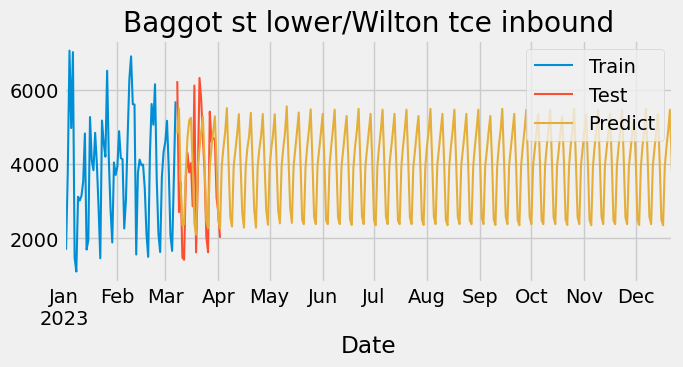

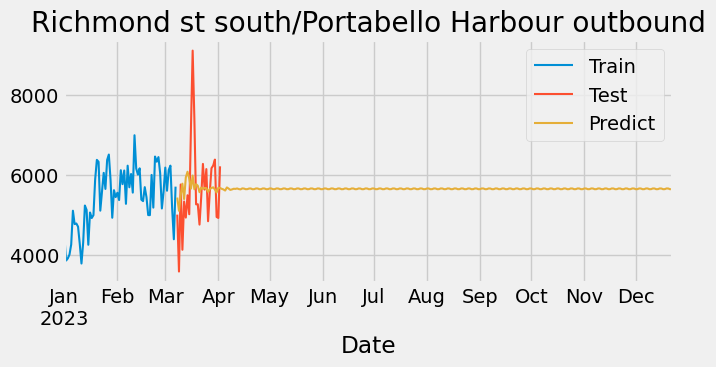

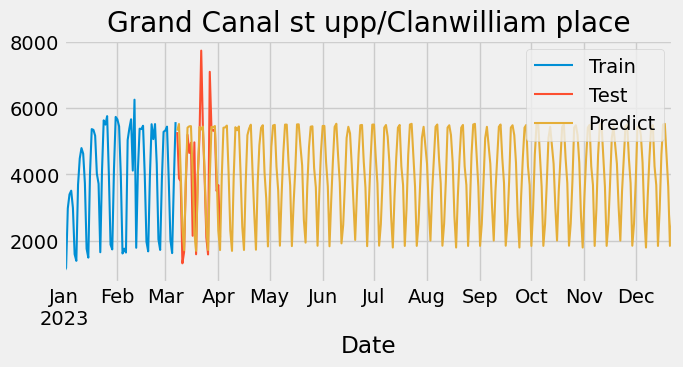

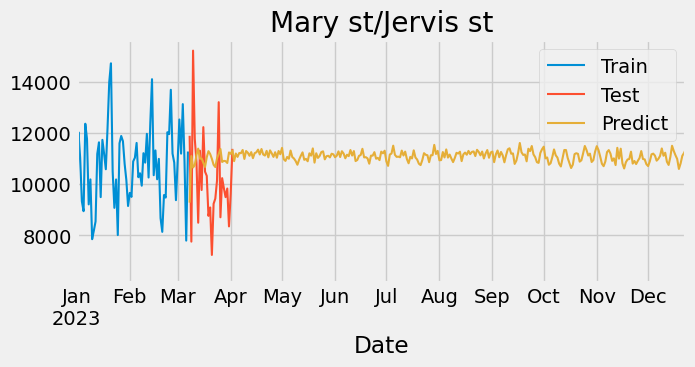

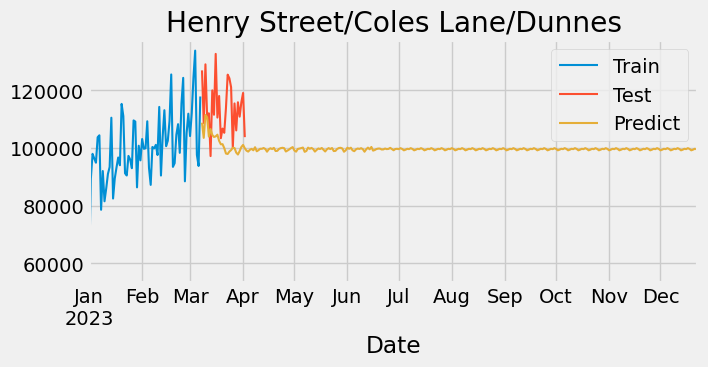

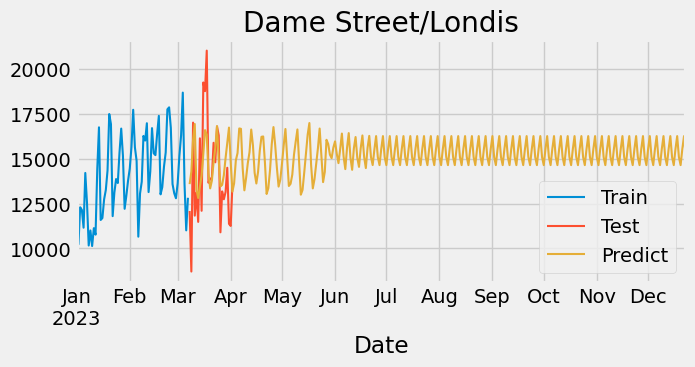

In [46]:
our_predictions = forecast_regression(df_our_data_set1)

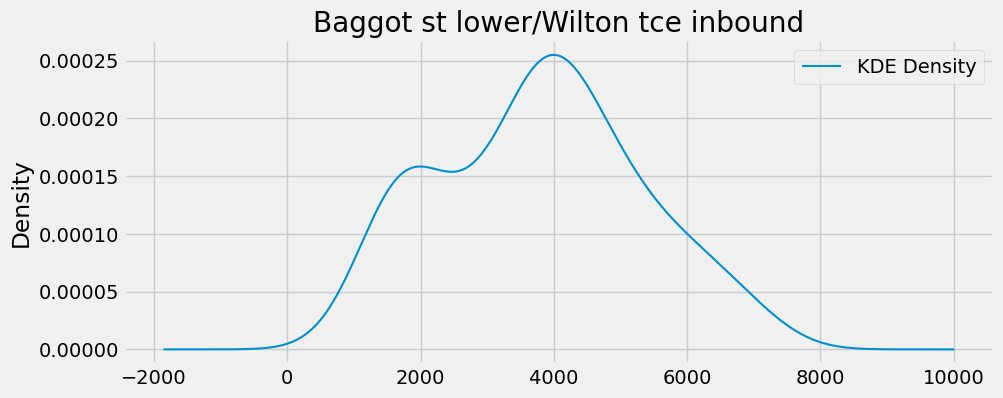

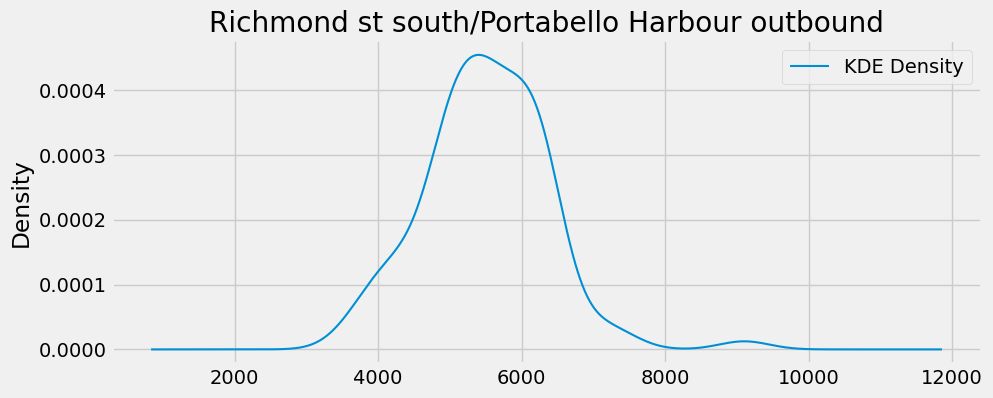

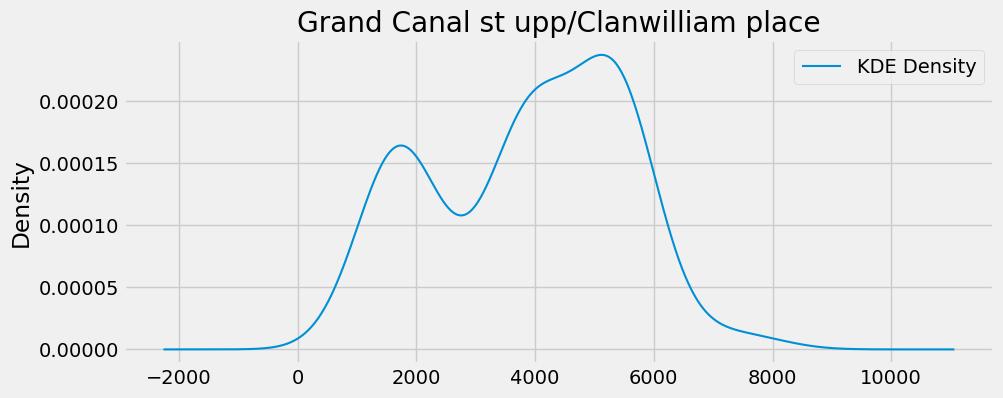

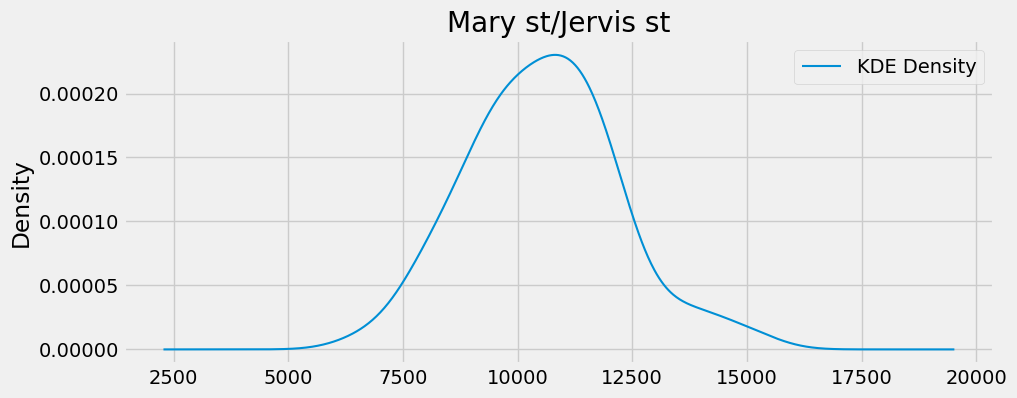

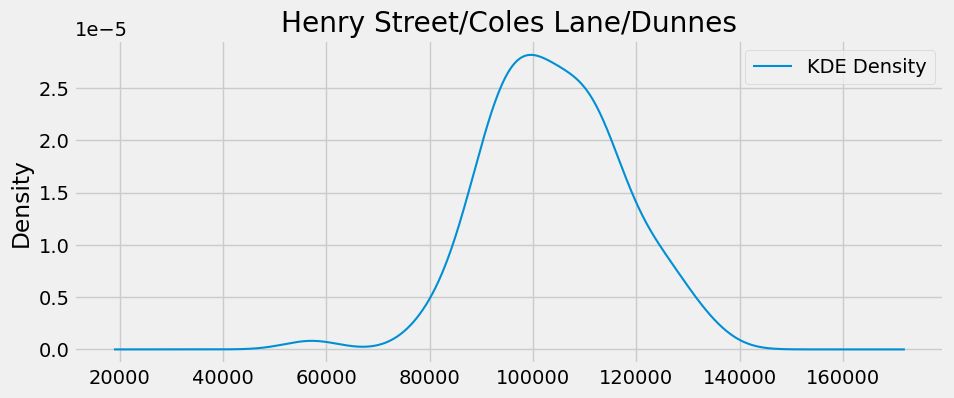

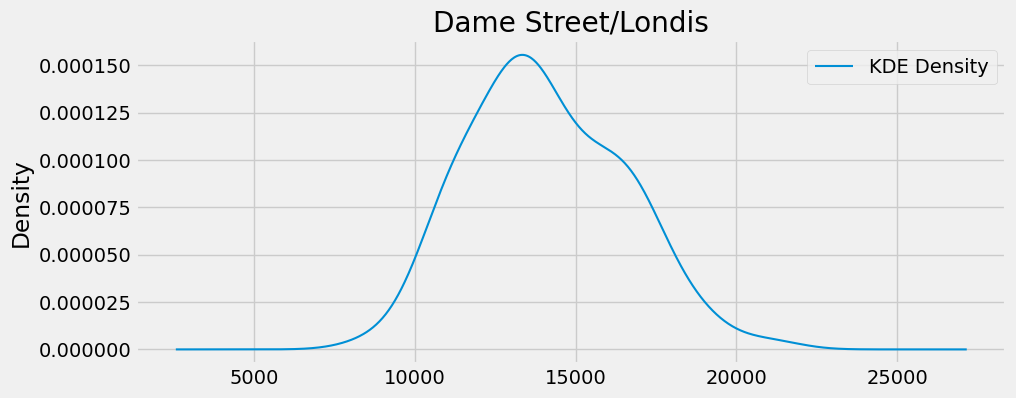

In [47]:
for column in top_five_best_models:
    automate_dist_graphs(column,df_our_data_set1)

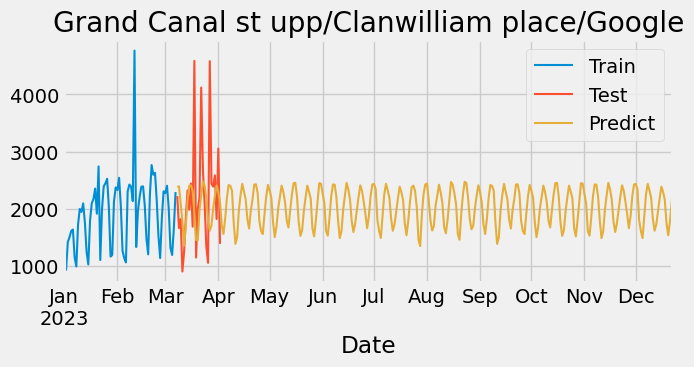

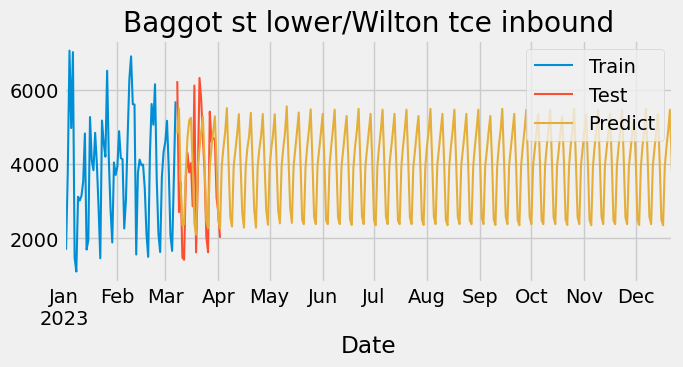

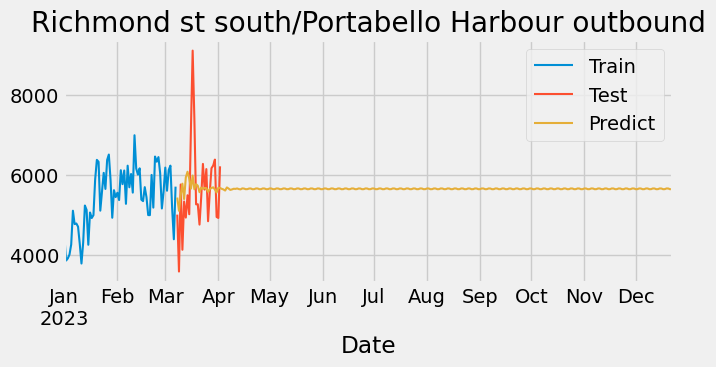

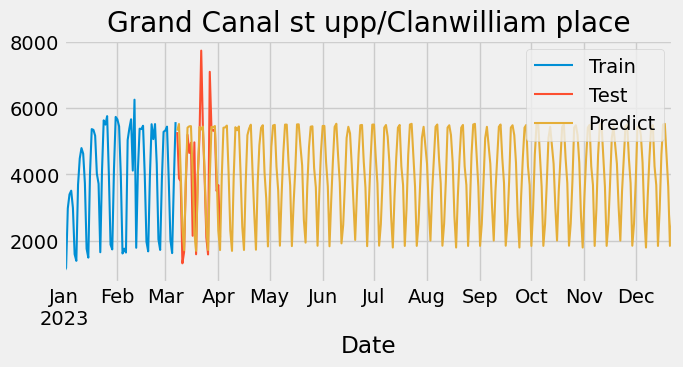

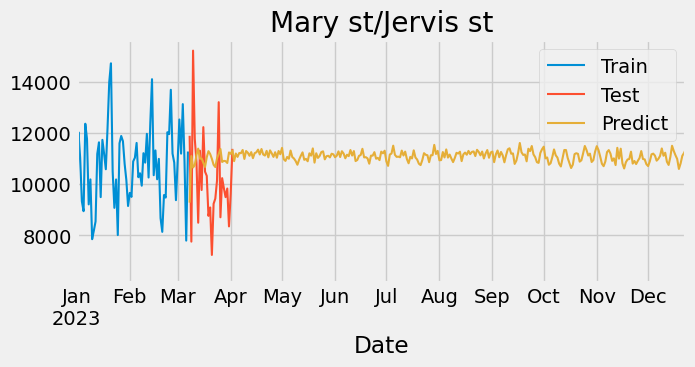

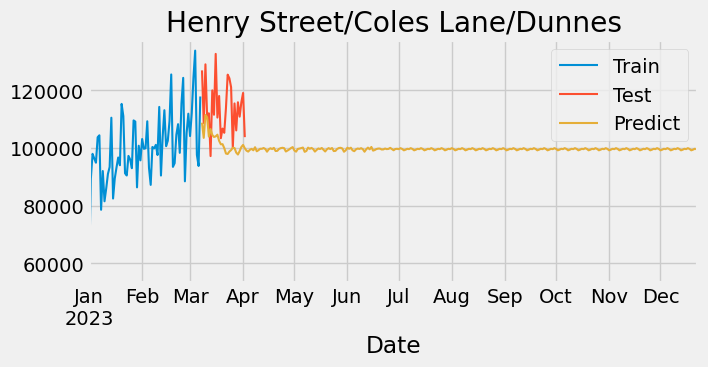

In [73]:
our_predictions = forecast_regression(df_our_data_set2)

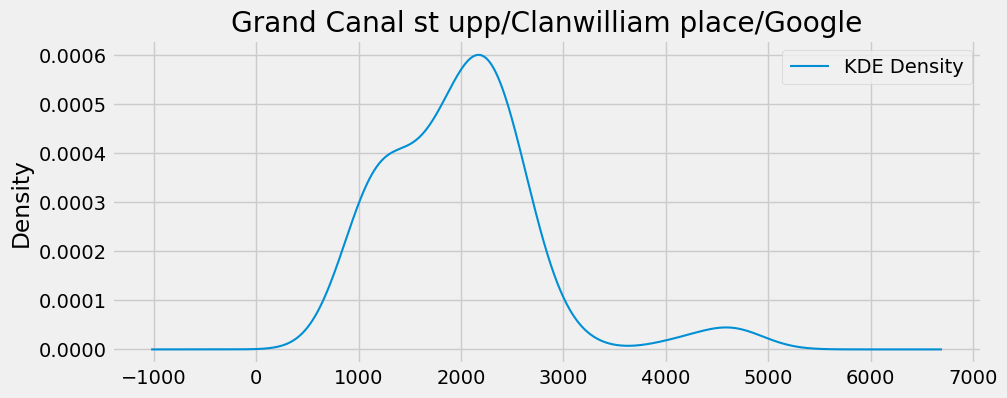

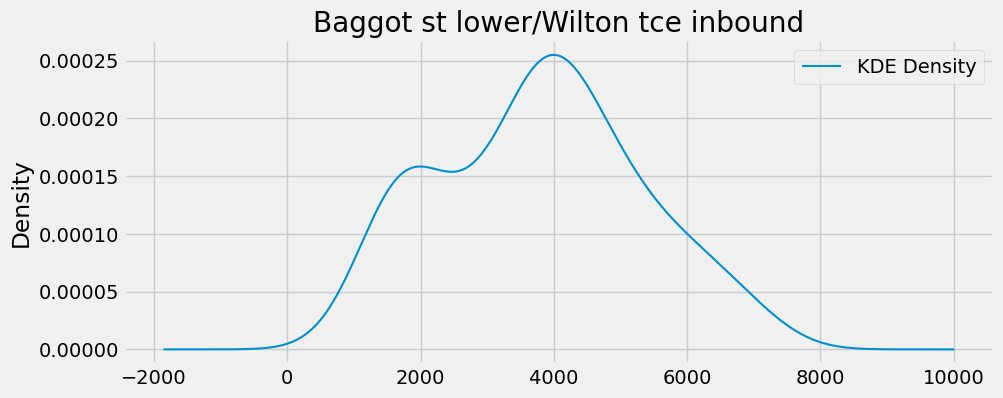

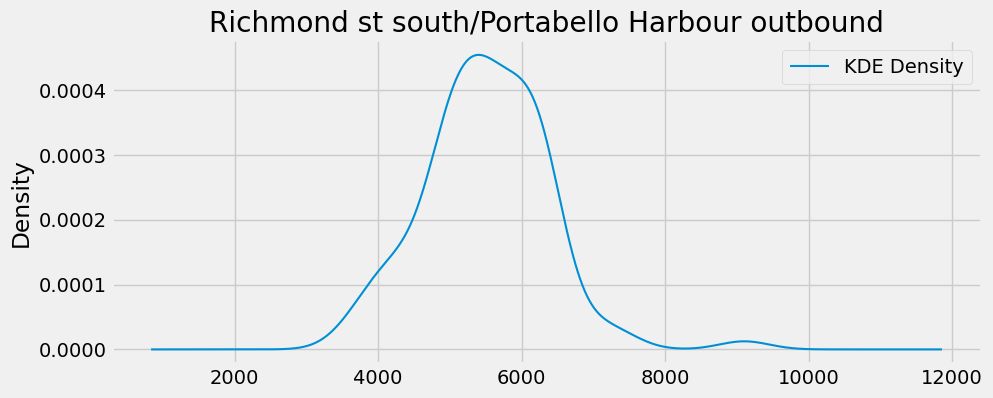

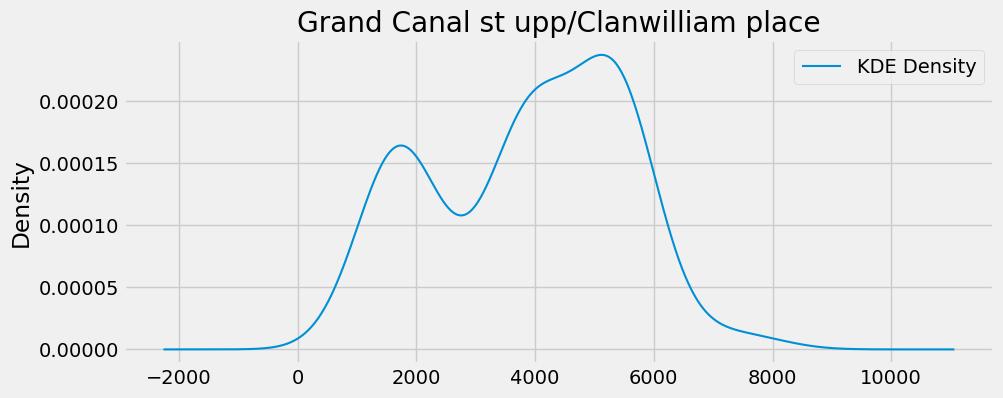

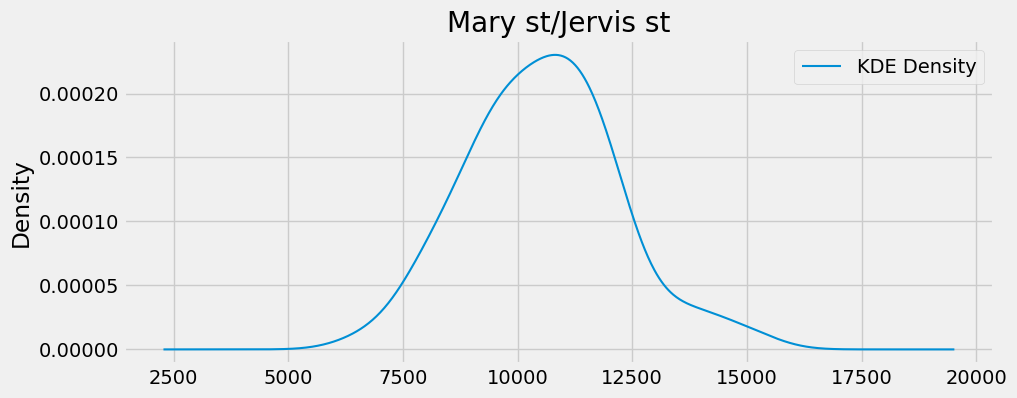

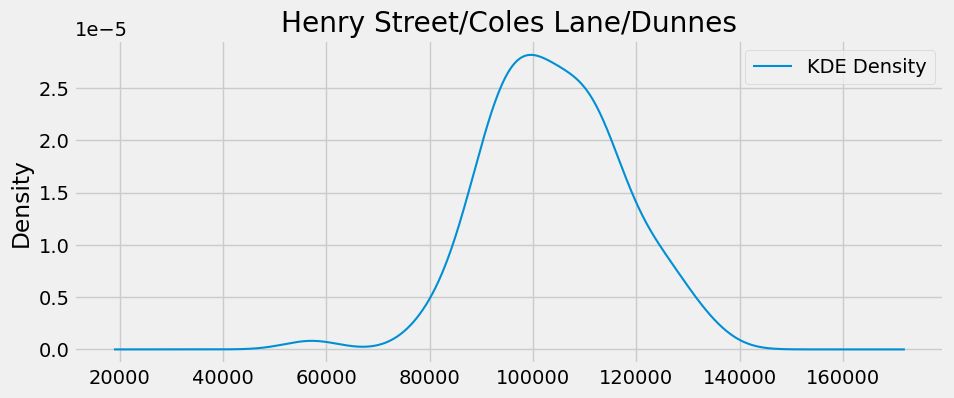

In [74]:
for column in top_five_best_models:
    automate_dist_graphs(column,df_our_data_set1)

In [75]:
r2_error_arr

{'Grand Canal st upp/Clanwilliam place/Google': -0.15353961418001427,
 'Richmond st south/Portabello Harbour outbound': -0.09378806887159996,
 "O'Connell St/Parnell St/AIB": -0.3127429231152228,
 'Baggot st lower/Wilton tce inbound': -1.2480547177844152,
 'Grand Canal st upp/Clanwilliam place': -1.9526349451615785,
 'Mary st/Jervis st': -0.00012935725496121542,
 'Grafton Street / Nassau Street / Suffolk Street': -0.7120879066325003,
 'Dame Street/Londis': -0.6912980622944958,
 "O'Connell st/Princes st North": -0.19416967298174437,
 'College st/Westmoreland st': -0.7854969595599446,
 "D'olier st/Burgh Quay": -3.073435238947857,
 'Grafton Street/CompuB': -0.9783767242263879,
 'College Green/Bank Of Ireland': -0.2509061020306347,
 'Richmond st south/Portabello Harbour inbound': -0.19196185206281546,
 'Capel st/Mary street': -2.201328919040072,
 'Liffey st/Halfpenny Bridge ': -0.0851988632851095,
 'Westmoreland Street East/Fleet street': -0.4107548802391614,
 'North Wall Quay/Samuel Becket